In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
# Load your sample data
df = pd.read_csv(r'C:/Users/cambr/Dropbox/GIS_Data_Application/locations.csv')  

In [23]:
# Provide the path to the .shp file in your directory
watersheds = gpd.read_file('C:\Users\cambr\Dropbox\GIS_Data_Application\OWBTERT\LIO-2023-01-26\ONT_WSHED_BDRY_TERT_DERIVED.shp') 


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2842415077.py, line 2)

In [1]:
import geopandas as gpd

In [4]:
# Load the shapefile
df = gpd.read_file(r'C:\Users\cambr\Dropbox\GIS_Data_Application\US_Landuse_Shapefile.shp')

In [5]:

print(df.columns)



Index(['fid', 'DN', 'OGF_ID', 'NAME', 'CODE', 'AREA_HA', 'OBJECTID',
       'PERIMETER', 'HUC', 'HUC14', 'SHED_ID', 'BASIN', 'SUB', 'DRAIN_TO',
       'WCOURSE', 'OUTLET', 'SEC', 'TN', 'RNG', 'CO', 'AREA_MI', 'TDA_MI',
       'Shape_STAr', 'Shape_STLe', 'ReferenceC', 'ShapeSTAre', 'ShapeSTLen',
       'WSHED_NAME', 'PWS_STATUS', 'NPS_PRIORI', 'WSHED_CODE', 'WATERSHED_',
       'WATERSHE_1', 'TOTAL_STRE', 'TOTAL_LAKE', 'TOTAL_WETL', 'NPS_OVERAL',
       'NPS_OVER_1', 'NPS_STREAM', 'NPS_STRE_1', 'NPS_LAKE_R', 'NPS_LAKE_1',
       'NPS_GW_RAN', 'NPS_GW_R_1', 'layer', 'path', 'Area', 'Area_1',
       'geometry'],
      dtype='object')


In [10]:
# Group by watershed and landuse and sum the areas
grouped = df.groupby(['OBJECTID', 'DN'])['Area'].sum().reset_index()



In [11]:
# Calculate the total area for each watershed
total_area = df.groupby('OBJECTID')['Area'].sum()



In [12]:
print(total_area)

OBJECTID
640     5.507934e+08
1729    9.889665e+07
1787    6.055791e+08
2075    4.759724e+08
2098    1.343827e+08
2208    9.472157e+07
Name: Area, dtype: float64


In [13]:
# Calculate the percentage area for each landuse
grouped['percentage'] = grouped.apply(lambda row: (row['Area'] / total_area[row['OBJECTID']]) * 100, axis=1)

print(grouped)

     OBJECTID   DN          Area  percentage
0         640    0  3.491247e+03    0.000634
1         640    1  6.003576e+07   10.899869
2         640    4  3.731304e+04    0.006774
3         640    5  4.039892e+07    7.334677
4         640    6  1.496850e+04    0.002718
..        ...  ...           ...         ...
178      2208  143  1.737572e+07   18.343997
179      2208  152  4.650939e+05    0.491012
180      2208  176  1.018552e+07   10.753119
181      2208  190  3.582654e+06    3.782300
182      2208  195  1.384927e+07   14.621034

[183 rows x 4 columns]


In [ ]:
# Define the mapping for specified codes
code_to_landcover = {
    61: "Fallow/Idle Cropland",
    62: "Pasture/Grass",
    63: "Forest",
    64: "Shrubland",
    65: "Barren",
    # Add mappings for 66-80 as per your data (not provided in your list)
    81: "Clouds/No Data",
    82: "Developed",
    83: "Water",
    87: "Wetlands",
    88: "Nonag/Undefined",
    92: "Aquaculture",
    111: "Open Water",
    112: "Perennial Ice/Snow",
    121: "Developed/Open Space",
    122: "Developed/Low Intensity",
    123: "Developed/Med Intensity",
    124: "Developed/High Intensity",
    131: "Barren",
    141: "Deciduous Forest",
    142: "Evergreen Forest",
    143: "Mixed Forest",
    152: "Shrubland",
    176: "Grassland/Pasture",
    190: "Woody Wetlands",
    195: "Herbaceous Wetlands"
}

# Function to get land cover name
def get_landcover_name(code):
    return code_to_landcover.get(code, "Agriculture")

# Create the new column
df['landcover_name'] = gdf['DN'].apply(get_landcover_name)

# Optional: Check the DataFrame
print(gdf.head())

In [17]:

import seaborn as sns


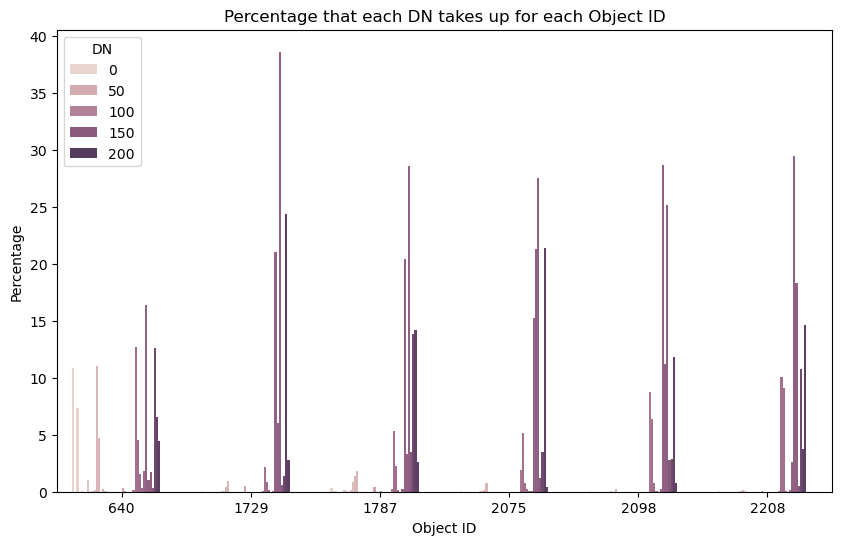

In [18]:

# Assuming 'OBJECTID' and 'DN' are columns in your DataFrame
plt.figure(figsize=(10,6))

# Create a grouped bar plot
sns.barplot(x='OBJECTID', y='percentage', hue='DN', data=grouped)

plt.xlabel('Object ID')
plt.ylabel('Percentage')
plt.title('Percentage that each DN takes up for each Object ID')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'OBJECTID' and 'DN' are columns in your DataFrame
plt.figure(figsize=(10,6))

# Create a grouped bar plot
sns.barplot(x='OBJECTID', y='percentage', hue='DN', data=grouped)

plt.xlabel('Object ID')
plt.ylabel('Percentage')
plt.title('Percentage that each DN takes up for each Object ID')
plt.show()